In [5]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
from tqdm import tqdm
import datetime
import proplot as plot
from netCDF4 import Dataset
from wrf import getvar
%matplotlib inline

plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

Read in stuff

In [6]:
import pickle
path = '../output/1010_nc/'
buoy='Yes'
if buoy=='Yes':
    filePCA = [path+'BUOY_pca_nc',path+'U_pca_nc',path+'V_pca_nc',path+'W_pca_nc',path+'QV_pca_nc']
    fileA = [path+'normalBUOY_ctrl_nc',path+'normalU_ctrl_nc',path+'normalV_ctrl_nc',path+'normalW_ctrl_nc',path+'normalQV_ctrl_nc']
else:
    filePCA = [path+'T_pca_nc',path+'U_pca_nc',path+'V_pca_nc',path+'W_pca_nc',path+'QV_pca_nc']
    fileA = [path+'normalT_ctrl_nc',path+'normalU_ctrl_nc',path+'normalV_ctrl_nc',path+'normalW_ctrl_nc',path+'normalQV_ctrl_nc']

outputPCA,outputA,outputAf = [],[],[]
for i in range(len(filePCA)):
    with open(filePCA[i],'rb') as f:
        outputPCA.append(pickle.load(f))
#    with open(fileA[i],'rb') as f:
#        outputA.append(pickle.load(f))
#    with open(fileAf[i],'rb') as f:
#        outputAf.append(pickle.load(f))

PCA_dict = {'dtheta':outputPCA[0],'u':outputPCA[1],'v':outputPCA[2],'w':outputPCA[3],'qv':outputPCA[4]}
#A_dict = {'dtheta':outputA[0],'du':outputA[1],'dv':outputA[2],'u':outputA[3],'v':outputA[4],'w':outputA[5],
#         'ur':outputA[6],'vr':outputA[7]}
#Af_dict = {'dtheta':outputAf[0],'du':outputAf[1],'dv':outputAf[2],'u':outputAf[3],'v':outputAf[4],'w':outputAf[5],
#          'ur':outputAf[6],'vr':outputAf[7]}

In [8]:
print("The number of required components to explain 90% variance of each variables: ")
print("dthetadt:"+str(np.abs(PCA_dict['dtheta'].explained_variance_ratio_.cumsum()-0.9).argmin())+" "\
      "urad:"+str(np.abs(PCA_dict['u'].explained_variance_ratio_.cumsum()-0.9).argmin())+" "\
      "vtan:"+str(np.abs(PCA_dict['v'].explained_variance_ratio_.cumsum()-0.9).argmin())+" "\
      "w:"+str(np.abs(PCA_dict['w'].explained_variance_ratio_.cumsum()-0.9).argmin())+" "\
     "qv:"+str(np.abs(PCA_dict['qv'].explained_variance_ratio_.cumsum()-0.9).argmin()))

The number of required components to explain 90% variance of each variables: 
dthetadt:11 urad:3 vtan:2 w:9 qv:5


In [10]:
import gc
if buoy=='Yes':
    fileAf = [path+'normalBUOY_ctrlf_nc',path+'normalUf_ctrl_nc',path+'normalVf_ctrl_nc',path+'normalWf_ctrl_nc',path+'normalQV_ctrlf_nc']
else:
    fileAf = [path+'normalTf_ctrl_nc',path+'normalUf_ctrl_nc',path+'normalVf_ctrl_nc',path+'normalWf_ctrl_nc',path+'normalQV_ctrlf_nc']
    
for i in range(len(filePCA)):
    with open(fileA[i],'rb') as f:
        outputA.append(pickle.load(f))
    with open(fileAf[i],'rb') as f:
        outputAf.append(pickle.load(f))
A_dict = {'dtheta':outputA[0],'du':outputA[1],'dv':outputA[2],'u':outputA[3],'v':outputA[4],'w':outputA[5],
         'ur':outputA[6],'vr':outputA[7]}
Af_dict = {'dtheta':outputAf[0],'du':outputAf[1],'dv':outputAf[2],'u':outputAf[3],'v':outputAf[4],'w':outputAf[5],
          'ur':outputAf[6],'vr':outputAf[7]}
del outputPCA,outputA,outputAf
gc.collect()

FileNotFoundError: [Errno 2] No such file or directory: '../output/1010_nc/normalU_ctrl_nc'

#### We first plot the explained variance ratio

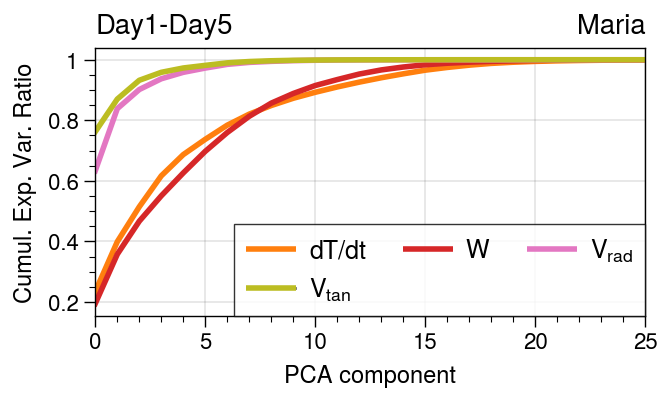

In [3]:
import matplotlib.patheffects as path_effects
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab10')
cmapC = cmap((np.linspace(0.15,0.8,5)))
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=2.75,refaspect=2.051,span=False)
with sns.color_palette("Spectral", n_colors=5):
    axs[0].plot(np.linspace(0,PCA_dict['dtheta'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['dtheta'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['dtheta'].explained_variance_ratio_.cumsum(),lw=2,label='dT/dt',color=cmapC[0])
    axs[0].plot(np.linspace(0,PCA_dict['w'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['w'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['w'].explained_variance_ratio_.cumsum(),lw=2,label='W',color=cmapC[1])
    axs[0].plot(np.linspace(0,PCA_dict['u'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['u'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['u'].explained_variance_ratio_.cumsum(),lw=2,label=r'V$_{rad}$',color=cmapC[3])
    axs[0].plot(np.linspace(0,PCA_dict['v'].explained_variance_ratio_.cumsum().shape[0]-1,\
                            PCA_dict['v'].explained_variance_ratio_.cumsum().shape[0]),\
                PCA_dict['v'].explained_variance_ratio_.cumsum(),lw=2,label=r'V$_{tan}$',color=cmapC[4],
                path_effects=[path_effects.Stroke(linewidth=1,foreground='k'),path_effects.Normal()])
axs[0].format(xlabel='PCA component',ylabel='Cumul. Exp. Var. Ratio')
axs[0].legend(loc='lr')
axs.format(xlim=[0,25],ltitle='Day1-Day5',rtitle='Maria')
for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
plt.show()

Smoother fields require less PCA components to explain 80\% variance than difference terms.

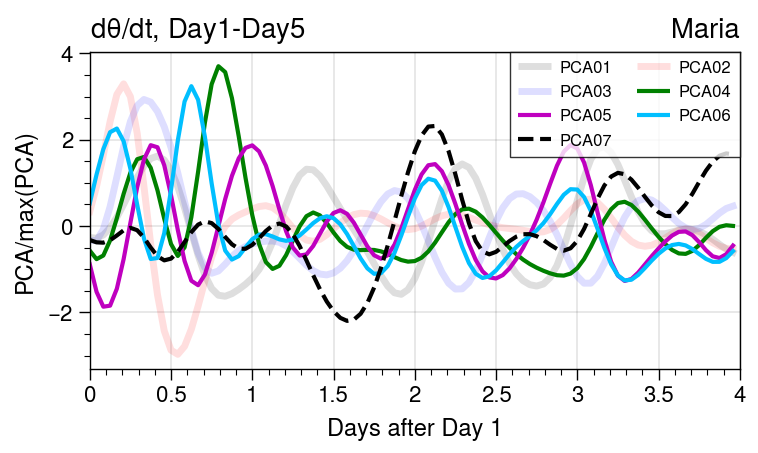

In [8]:
from scipy.ndimage import uniform_filter1d
# PCA time series (scaled to unit variance)
#################################################
pca_timeseries = PCA_dict['dtheta'].transform(Af_dict['dtheta'])[:,0:8]/np.sqrt(PCA_dict['dtheta'].explained_variance_[0:8])
#pcadu_timeseries = PCA_dict['du'].transform(Af_dict['du'])[:,0:6]/np.sqrt(PCA_dict['du'].explained_variance_[0:6])
#pcadv_timeseries = PCA_dict['dv'].transform(Af_dict['dv'])[:,0:6]/np.sqrt(PCA_dict['dv'].explained_variance_[0:6])

#Plot
#############################################################################################################
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,3],1),c='g',label='PCA04')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,4],1),c='m',label='PCA05')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,5],1),c='deepskyblue',label='PCA06')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,6],1),c='k',label='PCA07',ls='--')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,7],1),c='hotpink',label='PCA08')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA/max(PCA)')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='Maria')

for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
#plt.savefig('./proc_fig/dthetadt_PCA.png',dpi=200)
plt.show()

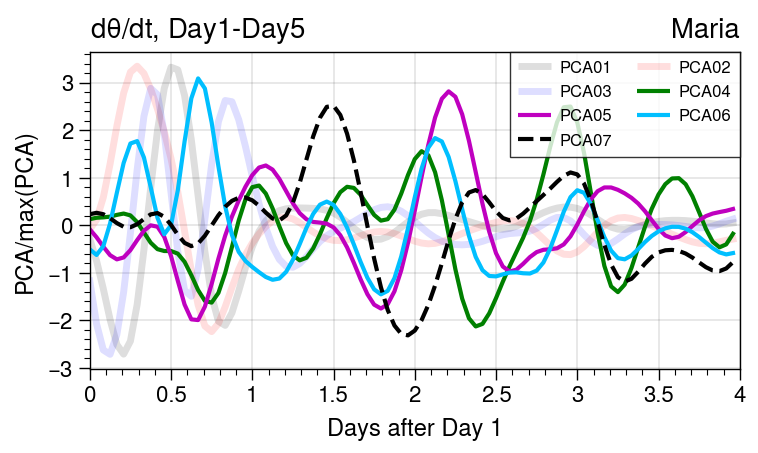

In [4]:
from scipy.ndimage import uniform_filter1d
# PCA time series (scaled to unit variance)
#################################################
pca_timeseries = PCA_dict['dtheta'].transform(Af_dict['dtheta'])[:,0:8]/np.sqrt(PCA_dict['dtheta'].explained_variance_[0:8])
#pcadu_timeseries = PCA_dict['du'].transform(Af_dict['du'])[:,0:6]/np.sqrt(PCA_dict['du'].explained_variance_[0:6])
#pcadv_timeseries = PCA_dict['dv'].transform(Af_dict['dv'])[:,0:6]/np.sqrt(PCA_dict['dv'].explained_variance_[0:6])

#Plot
#############################################################################################################
fig,axs = plot.subplots(ncols=1,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,3],1),c='g',label='PCA04')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,4],1),c='m',label='PCA05')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,5],1),c='deepskyblue',label='PCA06')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,6],1),c='k',label='PCA07',ls='--')
#axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(pca_timeseries[:,7],1),c='hotpink',label='PCA08')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='PCA/max(PCA)')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'd$\theta$/dt, Day1-Day5',rtitle='Maria')

for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('./proc_fig/dthetadt_PCA.png',dpi=200)
plt.show()

In [ ]:
from scipy.ndimage import uniform_filter1d
TESTu = PCA_dict['ur'].transform(Af_dict['ur'])[:,0:8]/np.sqrt(PCA_dict['ur'].explained_variance_[0:8])
TESTv = PCA_dict['vr'].transform(Af_dict['vr'])[:,0:8]/np.sqrt(PCA_dict['vr'].explained_variance_[0:8])
TESTw = PCA_dict['w'].transform(Af_dict['w'])[:,0:8]/np.sqrt(PCA_dict['w'].explained_variance_[0:8])
fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,5],1),c='deepskyblue',label='PCA06')
axs[0].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTu[:,6],1),c='k',label='PCA07',ls='--')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'V$_{rad,r}$ PCA, Day1-Day5',rtitle='Maria')

axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,5],1),c='deepskyblue',label='PCA06')
axs[1].plot(np.linspace(5,95,91)/24,uniform_filter1d(TESTv[:,6],1),c='k',label='PCA07',ls='--')
axs[1].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[1].legend(loc='ur',ncols=2,prop={'size':6})
axs[1].format(ltitle=r'V$_{tan,r}$ PCA, Day1-Day5',rtitle='Maria')

axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,5],1),c='deepskyblue',label='PCA06')
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,6],1),c='k',label='PCA07',ls='--')
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,7],1),c='hotpink',label='PCA08')
axs[2].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[2].legend(loc='ul',ncols=2,prop={'size':6})
axs[2].format(ltitle=r'W PCA, Day1-Day5',rtitle='Maria')

for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('./proc_fig/kinematics_PCA.png',dpi=200)
plt.show()

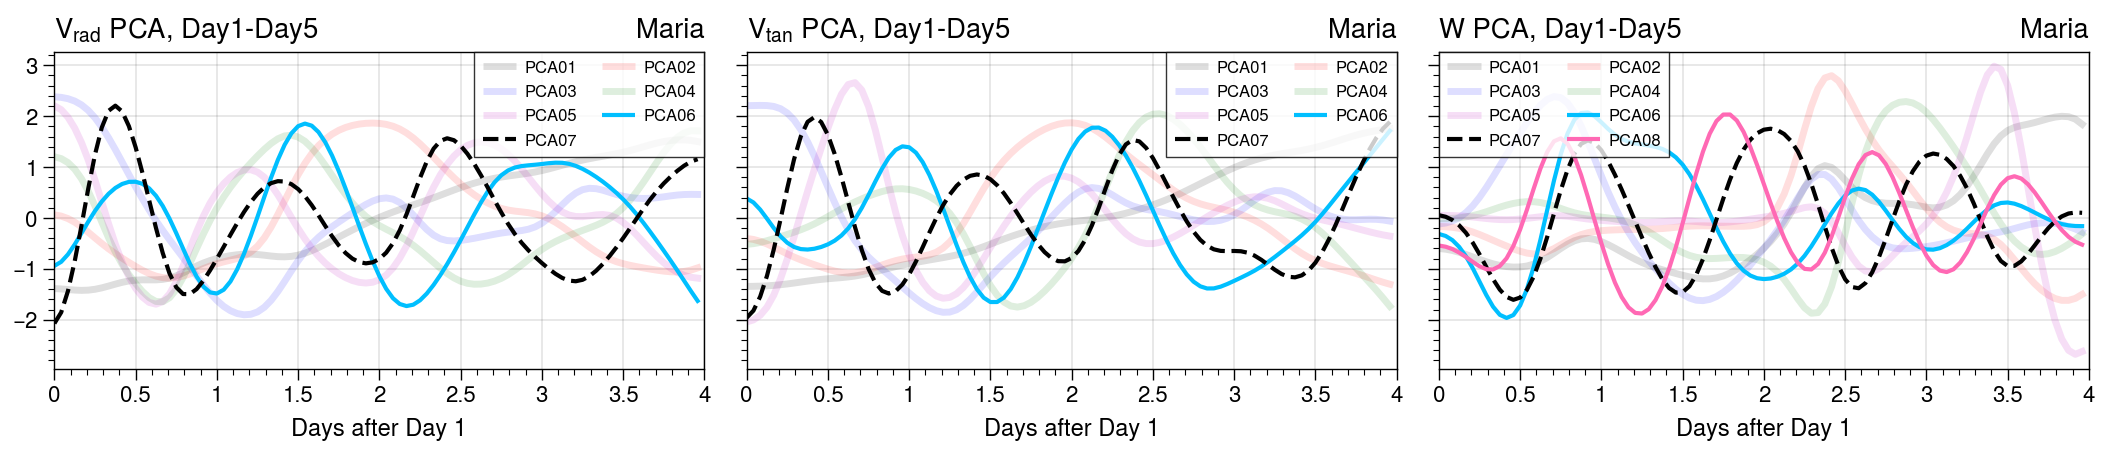

In [21]:
from scipy.ndimage import uniform_filter1d
TESTu = PCA_dict['u'].transform(Af_dict['u'])[:,0:8]/np.sqrt(PCA_dict['u'].explained_variance_[0:8])
TESTv = PCA_dict['v'].transform(Af_dict['v'])[:,0:8]/np.sqrt(PCA_dict['v'].explained_variance_[0:8])
TESTw = PCA_dict['w'].transform(Af_dict['w'])[:,0:8]/np.sqrt(PCA_dict['w'].explained_variance_[0:8])
fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.25,refaspect=2.051,span=False)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,5],1),c='deepskyblue',label='PCA06')
axs[0].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTu[:,6],1),c='k',label='PCA07',ls='--')
axs[0].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[0].legend(loc='ur',ncols=2,prop={'size':6})
axs[0].format(ltitle=r'V$_{rad}$ PCA, Day1-Day5',rtitle='Maria')

axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,5],1),c='deepskyblue',label='PCA06')
axs[1].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTv[:,6],1),c='k',label='PCA07',ls='--')
axs[1].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[1].legend(loc='ur',ncols=2,prop={'size':6})
axs[1].format(ltitle=r'V$_{tan}$ PCA, Day1-Day5',rtitle='Maria')

axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,0],1),c='k',label='PCA01',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,1],1),c='r',label='PCA02',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,2],1),c='b',label='PCA03',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,3],1),c='g',label='PCA04',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,4],1),c='m',label='PCA05',lw=2.5,alpha=0.13)
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,5],1),c='deepskyblue',label='PCA06')
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,6],1),c='k',label='PCA07',ls='--')
axs[2].plot(np.linspace(0,95,96)/24,uniform_filter1d(TESTw[:,7],1),c='hotpink',label='PCA08')
axs[2].format(xlim=[0,4],xlabel='Days after Day 1',ylabel='')#ylim=[-10,25],
axs[2].legend(loc='ul',ncols=2,prop={'size':6})
axs[2].format(ltitle=r'W PCA, Day1-Day5',rtitle='Maria')

for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('./proc_fig/kinematics_PCA.png',dpi=200)
plt.show()

#### Correlation plot

In [5]:
origin_path = '/scratch/06040/tg853394/tc/output/redux/maria/'
#Function####################################################
import json,pickle
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name
def nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx.values
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None
#############################################################
#########################################################################################################
ctrlvar_dict = read_some_azimuth_fields(fileloc=[origin_path+'ctl/azim_U10_0-144hr.nc',
                                                 origin_path+'ctl/azim_QVAPOR_0-144hr.nc',
                                                 origin_path+'ctl/azim_RTHRATLW_0-144hr.nc',
                                                 origin_path+'ctl/azim_RTHRATLWC_0-144hr.nc',
                                                 origin_path+'ctl/azim_RTHRATSW_0-144hr.nc',
                                                 origin_path+'ctl/azim_RTHRATSWC_0-144hr.nc'],
                                        fieldname=['U10','QVAPOR','RTHRATLW','RTHRATLWC','RTHRATSW','RTHRATSWC'])
r0,r200=(nearest_index(ctrlvar_dict['U10']['U10'].radius,0),nearest_index(ctrlvar_dict['U10']['U10'].radius,200))
r300,r500=(nearest_index(ctrlvar_dict['U10']['U10'].radius,300),nearest_index(ctrlvar_dict['U10']['U10'].radius,500))

In [16]:
def export_corrmap(PCAinput=None,orig_normalarray=None,orig_flatarray=None,component=4,TYPE='correlation'):
    # Adapted from eofs package
    slicer = slice(0,component)
    dt_eigenvector = PCAinput.components_[:,slicer].copy()/np.sqrt(PCAinput.explained_variance_[slicer])
    dt_eigenvector_a = dt_eigenvector-np.nanmean(dt_eigenvector,axis=0)
    ############################################
    # Center pcs and field
    ############################################
    pcs_std = np.nanstd(dt_eigenvector_a,axis=0)
    field_std = np.nanstd(orig_flatarray,axis=0)
    ############################################
    # Set the divisor.
    ############################################
    div = np.float64(dt_eigenvector_a.shape[0])
    ############################################
    # Compute the correlation map.
    ############################################
    cor = np.ma.dot(orig_flatarray.T, dt_eigenvector_a).T / div
    if TYPE=='correlation':
        cor = np.ma.masked_invalid(cor)
        cor /= np.ma.outer(pcs_std, field_std)
    else:
        cor=cor
    
    output = []
    for cornum in cor:
        output.append(cornum.reshape(orig_normalarray[0,:,:,:].shape))
    return output

import scipy
def azimuth2angle(azimuth=None):
    """
    https://math.stackexchange.com/questions/926226/conversion-from-azimuth-to-counterclockwise-angle
    """
    angletest = 450-azimuth
    for index,item in enumerate(angletest):
        if item>360:
            angletest[index] = item-360
        else:
            continue
    return angletest

def closest_index(array=None,target=None):
    return np.abs(array-target).argmin()

def polar2cartesian(outcoords, inputshape, origin):
    """Coordinate transform for converting a polar array to Cartesian coordinates. 
    inputshape is a tuple containing the shape of the polar array. origin is a
    tuple containing the x and y indices of where the origin should be in the
    output array."""

    xindex, yindex = outcoords
    x0, y0 = origin
    x = xindex - x0
    y = yindex - y0

    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    theta_index = np.round((theta + np.pi) * inputshape[1] / (2 * np.pi))

    return (r,theta_index)

def proc_tocart(polarfield=None,angle=None,twoD=True,twoDlv=None,standard=False):
    if twoD==True:
        PWnew = [np.asarray(polarfield)[int(twoDlv),int(np.abs(ANGLE-360).argmin()),:]]
        for i in np.linspace(0,358,359):
            PWnew.append(np.asarray(polarfield)[int(twoDlv),int(np.abs(ANGLE-i).argmin()),:])
        PWnew = np.swapaxes(np.asarray(PWnew),0,1)
        del i
        
        if standard==True:
            PWnew = (PWnew-np.nanmean(PWnew))/np.nanstd(PWnew)
        else:
            PWnew=PWnew

        test_2cartesian = scipy.ndimage.geometric_transform(PWnew, 
                                                            polar2cartesian,order=0,mode='constant',
                                                            output_shape = \
                                                            (PWnew.shape[0] * 2,PWnew.shape[0] * 2),
                                                            extra_keywords = \
                                                            {'inputshape':PWnew.shape,
                                                             'origin':(PWnew.shape[0],PWnew.shape[0])})
        #print('Finish processing')
        return ((test_2cartesian))

In [39]:
def display_crosssection(corrmap=None,xaxis=ctrlvar_dict['U10'].radius[:r500],
                         yaxis=None,index=None,standard=True,ax=None,rtitle=None,clv=np.linspace(-5,5,41),cticks=None):
    if standard is True:
        toplot = np.nanmean((np.asarray(corrmap[index])-np.nanmean(np.asarray(corrmap[index])))/np.nanstd(np.asarray(corrmap[index])),axis=1)
        img=ax.contourf(xaxis,yaxis,toplot,levels=clv,cmap='balance')
        ax.colorbar(img,loc='ur',ticks=cticks)
        ax.format(ltitle=r'PCA0'+str(index+1),rtitle=rtitle,xlabel='Distance from TC centre (km)',ylabel='Pressure (hPa)',ylim=[1000,50])
        ax.yaxis.label.set_size(8.5)
        ax.xaxis.label.set_size(8.5)
        ax.tick_params(axis='both', which='major', labelsize=8)
        return ax
        #plt.gca().invert_yaxis()
        
def display_avgprofil(corrmap=None,yaxis=None,index=None,standard=True,radius=None,ax=None,xlabel=None,color=['k','r'],lw=2,alpha=0.6):
    if standard is True:
        arrayS = (np.asarray(corrmap[index])-np.nanmean(np.asarray(corrmap[index])))/np.nanstd(np.asarray(corrmap[index]))
        profilIN = np.nanmean(arrayS[:,:,radius[0]:radius[1]],axis=(1,2))
        profilOUT = np.nanmean(arrayS[:,:,radius[1]:radius[2]],axis=(1,2))
        profilavg = np.nanmean(arrayS[:,:,radius[0]:radius[2]],axis=(1,2))
        flattened = np.concatenate((profilIN,profilOUT)).flatten()
        ax.plot(profilIN,yaxis,c=color[0],lw=lw,alpha=alpha,label='0-200 km')
        #ax.plot(profilOUT,yaxis,c=color[1],lw=lw,alpha=alpha,label='200-500 km')
        ax.format(title=r'PCA0'+str(index+1),xlabel=xlabel,ylabel='Pressure (hPa)',ylim=[1000,50],xlim=[np.min(flattened)*1.1,np.max(flattened)*1.1])
        ax.yaxis.label.set_size(8.5)
        ax.xaxis.label.set_size(8.5)
        ax.legend(loc='r',ncols=1)
        ax.tick_params(axis='both', which='major', labelsize=8) 
        return ax

def display_cart(corrmap=None,axs=None,index=None,heightindex=[6,20,32],cart_axis=None,ANGLE=None):
    #levels_u,levels_du,levels_dt=np.linspace(-3,3,31),np.linspace(-0.1,0.1,41),np.linspace(-0.08,0.08,33)
    for count,heightindx in enumerate((heightindex)):
        #maptoplot_tostand = corrmap[index][heightindx]
        toplot = np.fliplr(np.flipud((proc_tocart(corrmap[index],ANGLE,True,heightindx,True))))
        img = axs[count].contourf(cart_axis,cart_axis,toplot,levels=np.linspace(-np.max(np.abs(toplot))*1.05,np.max(np.abs(toplot))*1.05,21),cmap='balance',extend='both') #-.08,.08,33 (dt) -.1,.1,41 (du/dv)
        axs[count].colorbar(img,loc='b',ticks=[np.round(-np.max(np.abs(toplot))/1.5),0,np.round(np.max(np.abs(toplot))/1.5)])
        axs[count].format(xlabel='X (km)',ylabel='Y (km)',title=r'{} hPa'.format(int(coor.pres[heightindx].data)))
        axs[count].yaxis.label.set_size(8.5)
        axs[count].xaxis.label.set_size(8.5)
        axs[count].tick_params(axis='both', which='major', labelsize=8)
    return axs

In [44]:
#du_corrmap = export_corrmap(PCA_dict['u'],A_dict['du'],Af_dict['du'],6,'covariance')
#dv_corrmap = export_corrmap(PCA_dict['v'],A_dict['dv'],Af_dict['dv'],6,'covariance')
ur_corrmap = export_corrmap(PCA_dict['ur'],A_dict['ur'],Af_dict['ur'],8,'covariance')
v_corrmap = export_corrmap(PCA_dict['vr'],A_dict['vr'],Af_dict['vr'],8,'covariance')
u_corrmap = export_corrmap(PCA_dict['u'],A_dict['u'],Af_dict['u'],4,'covariance')
w_corrmap = export_corrmap(PCA_dict['w'],A_dict['w'],Af_dict['w'],8,'covariance')
dt_corrmap = export_corrmap(PCA_dict['dtheta'],A_dict['dtheta'],Af_dict['dtheta'],8,'covariance')

path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)

In [9]:
[np.abs(coor.pres-obj).argmin() for obj in [1000,850,700,500,200,150]]

[<xarray.DataArray 'pres' ()>
 array(0),
 <xarray.DataArray 'pres' ()>
 array(6),
 <xarray.DataArray 'pres' ()>
 array(12),
 <xarray.DataArray 'pres' ()>
 array(20),
 <xarray.DataArray 'pres' ()>
 array(32),
 <xarray.DataArray 'pres' ()>
 array(34)]

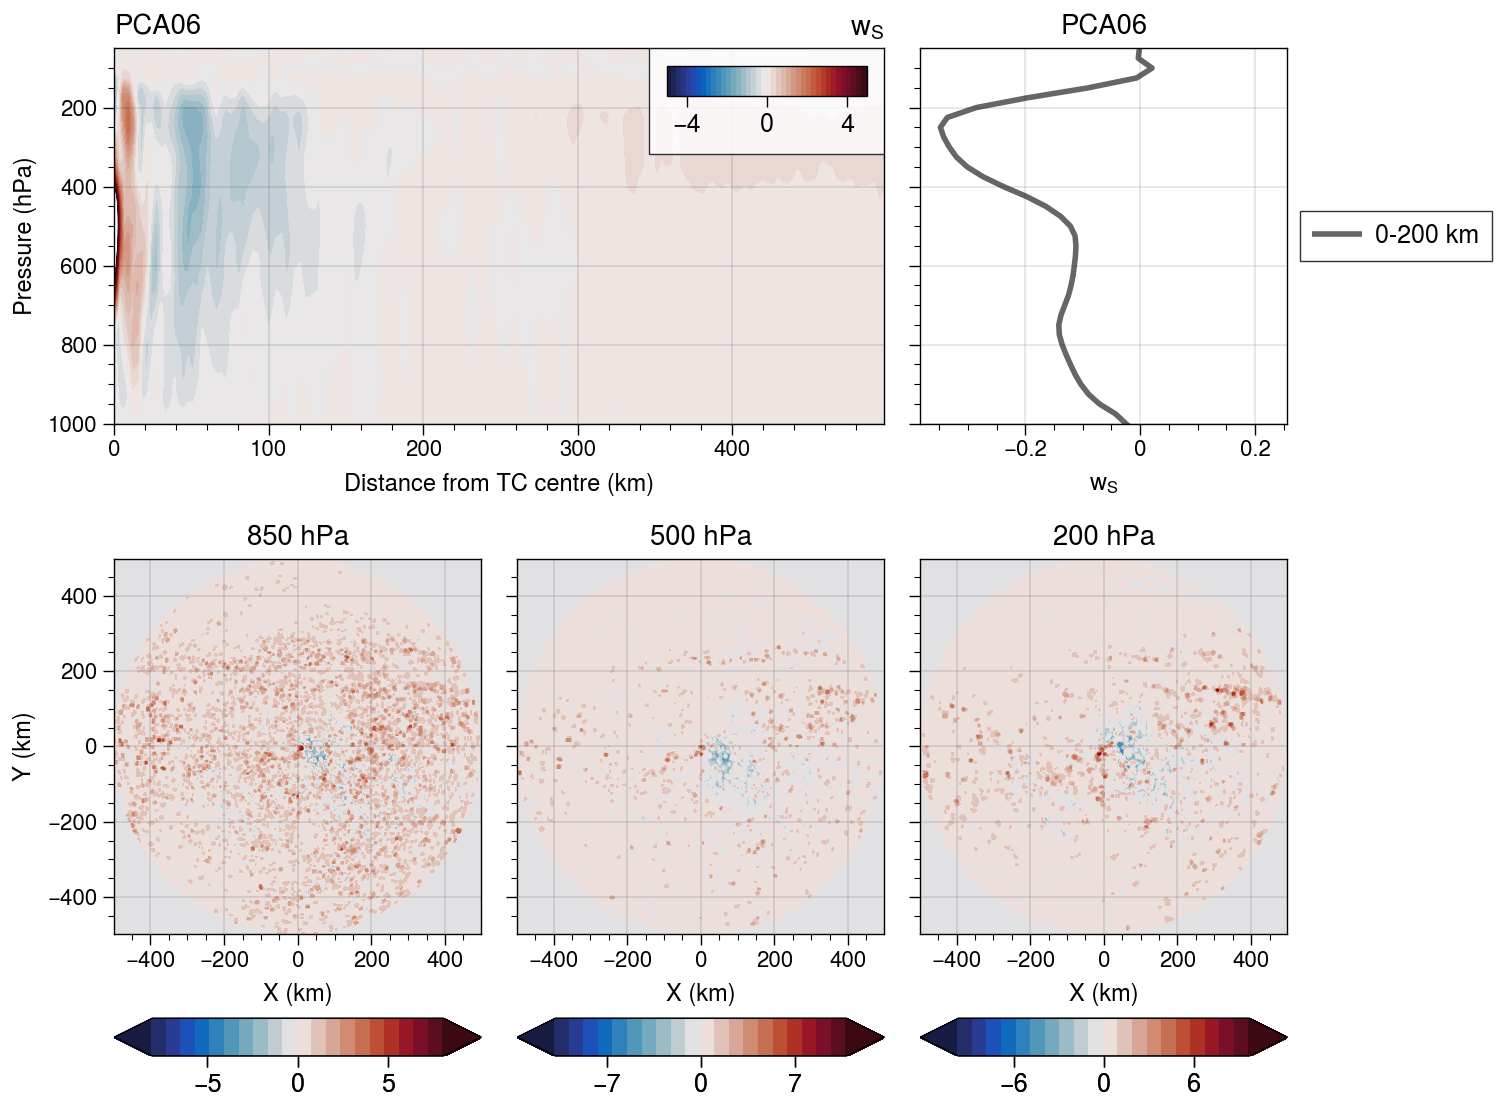

In [52]:
############################################################################################################################################
ANGLE = azimuth2angle(np.linspace(0,359,360))
NEWCART_axis = np.concatenate((np.flipud(-ctrlvar_dict['U10'].radius[:r500]),ctrlvar_dict['U10'].radius[:r500][:]))
path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)
############################################################################################################################################
array = [[1, 1, 2],[3, 4, 5]]
plotcomp=5
plotarray = w_corrmap
plotlabel = 'w$_{S}$'
fig,axs = plot.subplots(array,axwidth=3.85,refaspect=2.051,span=False,sharex=False)
display_crosssection(plotarray,ctrlvar_dict['U10'].radius[:r500],coor.pres,plotcomp,
                     True,axs[0],plotlabel,np.linspace(-5,5,41),[-4,0,4])
display_avgprofil(plotarray,coor.pres,plotcomp,True,[0,r200,r500],axs[1],plotlabel,['k','r'],2,0.6)
display_cart(plotarray,[axs[2],axs[3],axs[4]],plotcomp,[6,20,32],NEWCART_axis,ANGLE)
plt.savefig('./proc_fig/1122/structure_w_PCA0'+str(plotcomp+1)+'.png',dpi=400)
plt.show()

##### Axisymmetric part

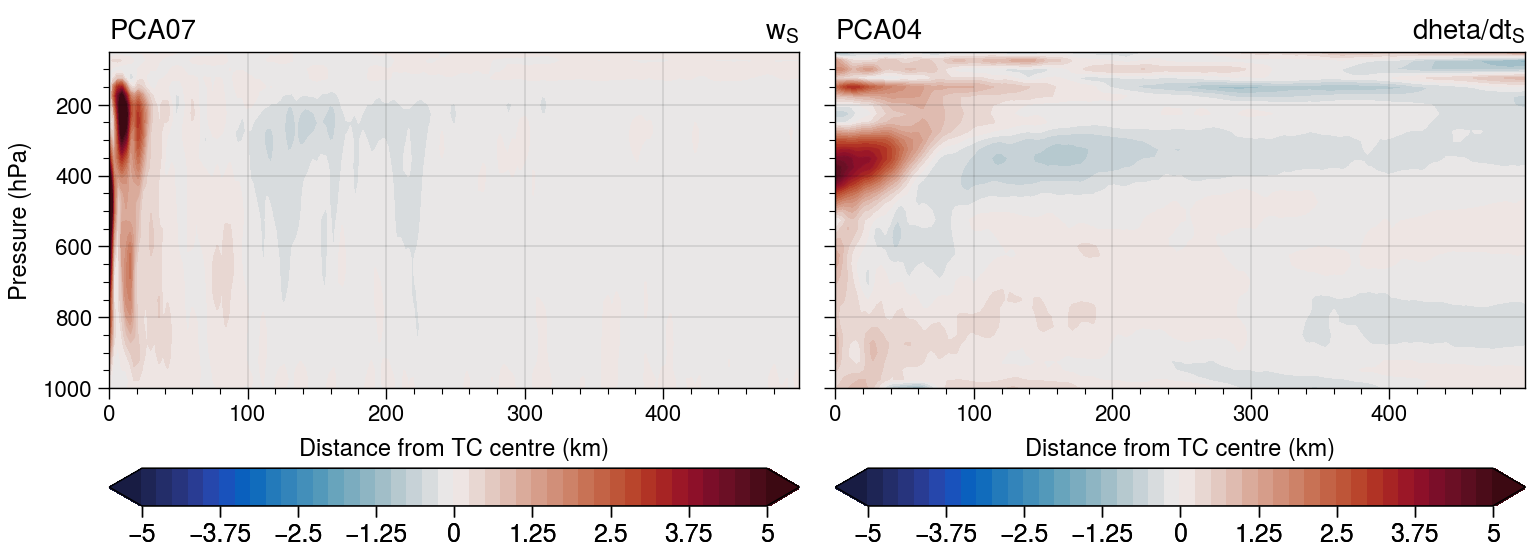

In [78]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=2.051,span=False)
img=axs[0].contourf(ctrlvar_dict['U10'].radius[:r500],coor.pres,testaxis_wpca7,levels=np.linspace(-5,5,41),cmap='balance',extend='both')
axs[0].colorbar(img,loc='b')
axs[0].format(ltitle=r'PCA0'+str(plti3+1),rtitle='w$_S$',xlabel='Distance from TC centre (km)',ylabel='Pressure (hPa)')

img=axs[1].contourf(ctrlvar_dict['U10'].radius[:r500],coor.pres,testaxis_dtpca4,levels=np.linspace(-5,5,41),cmap='balance',extend='both')
axs[1].colorbar(img,loc='b')
axs[1].format(ltitle=r'PCA0'+str(plti2+1),rtitle='d$\theta$/dt$_S$',xlabel='Distance from TC centre (km)',ylabel='Pressure (hPa)')
for axis in axs:
    axis.yaxis.label.set_size(8.5)
    axis.xaxis.label.set_size(8.5)
    axis.tick_params(axis='both', which='major', labelsize=8)
plt.gca().invert_yaxis()
plt.savefig('./proc_fig/axisym_wdthdt_PCA0407.png',dpi=200)
plt.show()

DL:(18.22,108.22)->(341.78,71.78) DR:(108.22,198.22) -> (341.78, 251.78) UR:(198.22,288.22)->(251.78, 161.78) UL:(288.22,18.22)->(161.78, 71.78)

In [12]:
def shear_quadrant_PCAprofile(array=None,angle=None,PASS0='No',TYPE='Profile',radius=None,PCAno=None,standard='Yes'):
    if TYPE=='Profile':
        if standard=='Yes':
            arrayS = (np.asarray(array[PCAno])-np.nanmean(np.asarray(array[PCAno])))/np.nanstd(array[PCAno])
        else:
            arrayS = array.copy()                                                                                     
        if PASS0=='No':
            return np.nanmean(arrayS[:,angle[0]:angle[1],radius[0]:radius[1]],axis=(1,2))
        elif PASS0=='Yes':
            anglechoseA = arrayS[:,angle[0]:,radius[0]:radius[1]]
            anglechoseB = arrayS[:,:angle[1],radius[0]:radius[1]]
            chosearray = np.concatenate((anglechoseA,anglechoseB),axis=1)
            return np.nanmean(chosearray[:,:,radius[0]:radius[1]],axis=(1,2))

#### To Cartesian

#### Project other fields

In [10]:
##############################################################################################################################################
# Preprocessing fields
def preproc_fields(var=None,timezoom=None,smooth='Yes',gaussian=0.9,fromcenter='Yes',inradius=None,outradius=r500,dostandard='Yes'):
    """
    Var: Input variable (must have 4 dimensions! Time-pres-theta-radius)
    """
    if smooth=='Yes':
        from scipy.ndimage import gaussian_filter
        normal_var = []
        if dostandard=='Yes':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'Yes'),sigma=gaussian))
        elif dostandard=='No':
            for presindex in range(len(var[0,:,0,0])):
                normal_var.append(gaussian_filter(normalize_inner(var[:,presindex,:,:],outradius,'No'),sigma=gaussian))            
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    else:
        normal_var = []
        for presindex in range(len(var[0,:,0,0])):
            normal_var.append(normalize_inner(var[:,presindex,:,:],outradius))
        normal_var = np.swapaxes(np.asarray(normal_var),0,1)
    if fromcenter=='Yes':
        normal_varf = np.asarray([normal_var[i,:,:,:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])
    elif fromcenter=='No':
        normal_varf = np.asarray([normal_var[i,:,:,inradius:outradius].flatten() \
                                  for i in range(len(normal_var[timezoom[0]:timezoom[1],0,0,0]))])        
    print("--Finish preprocesing--")
    return normal_var,normal_varf

def normalize_inner(var=None,outerradius=None,standard='Yes'):
    PWper_ctrl = []
    for indx in range(len(var[:,0,0])):
        temp = var[indx,:,:outerradius]-np.nanmean(var[indx,:,:outerradius],axis=(0,1))
        if standard=='Yes':
            PWper_ctrl.append((temp-np.nanmean(temp))/np.nanstd(temp))
        elif standard=='No':
            PWper_ctrl.append((temp))
    del temp
    return np.asarray(PWper_ctrl)
##############################################################################################################################################

In [13]:
ctrl_t2,ctrl_t4 = nearest_index(ctrlvar_dict['U10']['U10'].time/24,1)-1,nearest_index(ctrlvar_dict['U10']['U10'].time/24,5)-1
normalQVctrl,normalQVctrlf = preproc_fields(var=ctrlvar_dict['QVAPOR']['QVAPOR'],timezoom=[28,ctrl_t4],smooth='Yes',
                                  gaussian=[3,0,0],fromcenter='Yes',inradius=None,outradius=r500,dostandard='No')

--Finish preprocesing--


In [14]:
qvuradR_corrmap = export_corrmap(PCA_dict['ur'],normalQVctrl,normalQVctrlf,8,'covariance')

In [18]:
pcano=5
maptoplot = qvuradR_corrmap.copy()
levels_u,levels_du,levels_dt=np.linspace(-3,3,31),np.linspace(-0.1,0.1,41),np.linspace(-0.08,0.08,33)
for heightindx in tqdm([0,6,20,32,34]):
    fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=2.85,refaspect=1.251,span=False,sharey=False)
    maptoplot_tostand = maptoplot[pcano][heightindx]
    img = axs[0].contourf(ctrlvar_dict['U10'].radius[:r500],ctrlvar_dict['U10'].azmiuth,
                          (maptoplot_tostand-np.nanmean(maptoplot_tostand))/np.nanstd(maptoplot_tostand),
                          levels=levels_u,cmap='BuRd',extend='both')
    axs[0].colorbar(img,loc='lr',ticks=[-2.4,0,2.4])
    axs[0].format(xlim=[0,500],ylim=[0,360],xlabel='Distance from TC centre (km)',ltitle='Day 1-Day 5',
                  rtitle=r'PCA0'+str(pcano+1)+'({} hPa)'.format(int(coor.pres[heightindx].data)))
    axs[1].contourf(NEWCART_axis,NEWCART_axis,
                    np.fliplr(np.flipud((proc_tocart(maptoplot[pcano],ANGLE,True,heightindx,True)))),
                    levels=levels_u,
                    cmap='BuRd',extend='both') #-.08,.08,33 (dt) -.1,.1,41 (du/dv)
    axs[1].format(xlabel='X (km)',ylabel='Y (km)',ltitle='Cartesian',
                  rtitle=r'PCA0'+str(pcano+1)+'({} hPa)'.format(int(coor.pres[heightindx].data)))
    plt.savefig('./proc_fig/QVuradR_vPCA0'+str(pcano+1)+'_'+str(int(coor.pres[heightindx].data))+'_corr_nsCART.png',dpi=200)
    plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:48<00:00, 21.78s/it]


### Reconstruction

In [33]:
recon5,recon10,recon15,reconall = reconstruct_fromPCA(PCA_dict['dtheta'],Af_dict['dtheta'],A_dict['dtheta'],5,'No'),\
reconstruct_fromPCA(PCA_dict['dtheta'],Af_dict['dtheta'],A_dict['dtheta'],10,'No'),\
reconstruct_fromPCA(PCA_dict['dtheta'],Af_dict['dtheta'],A_dict['dtheta'],15,'No'),\
reconstruct_fromPCA(PCA_dict['dtheta'],Af_dict['dtheta'],A_dict['dtheta'],15,'Yes')
#Xhatc = Xhat.copy()
#Xhatc+=np.mean(Af_dict['dtheta'], axis=0)
#TESTrecon = Xhatc.reshape((Xhatc.shape[0],A_dict['dtheta'][0].shape[0],A_dict['dtheta'][0].shape[1],\
#               A_dict['dtheta'][0].shape[2]))

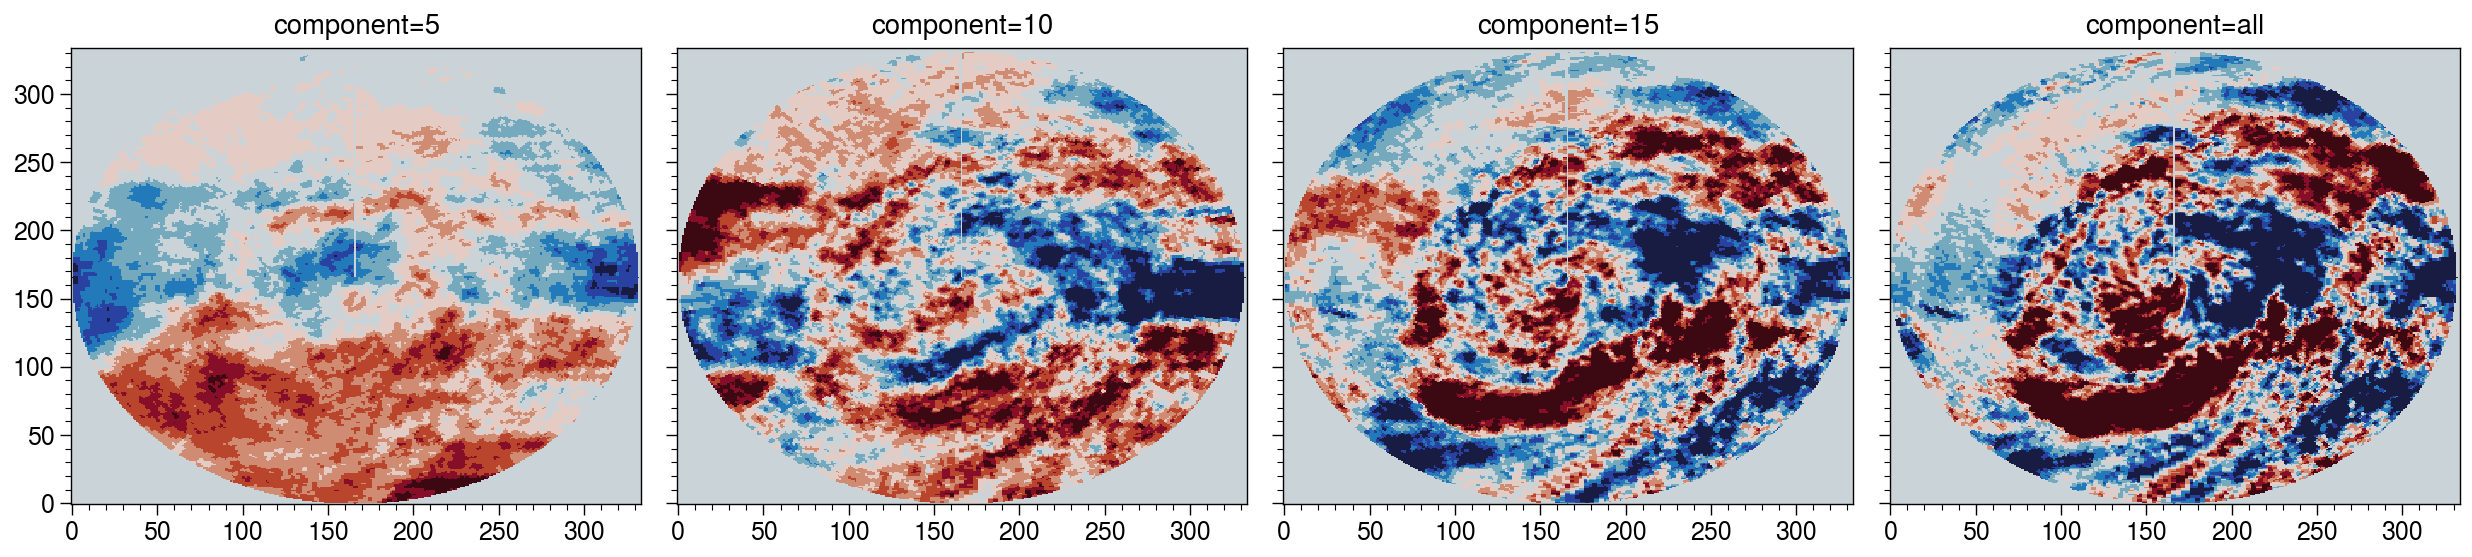

In [34]:
fig,axs = plot.subplots(ncols=4,nrows=1,axwidth=2.85,refaspect=1.251,span=False)
axs[0].pcolormesh(np.fliplr(np.flipud((proc_tocart(recon5[80,:,:,:],ANGLE,True,0)*3600))),vmin=-0.08,vmax=0.08,
              cmap='balance')
axs[0].format(title='component=5')
axs[1].pcolormesh(np.fliplr(np.flipud((proc_tocart(recon10[80,:,:,:],ANGLE,True,0)*3600))),vmin=-0.08,vmax=0.08,
              cmap='balance')
axs[1].format(title='component=10')
axs[2].pcolormesh(np.fliplr(np.flipud((proc_tocart(recon15[80,:,:,:],ANGLE,True,0)*3600))),vmin=-0.08,vmax=0.08,
              cmap='balance')
axs[2].format(title='component=15')
axs[3].pcolormesh(np.fliplr(np.flipud((proc_tocart(reconall[80,:,:,:],ANGLE,True,0)*3600))),vmin=-0.08,vmax=0.08,
              cmap='balance')
axs[3].format(title='component=all')
plt.show()

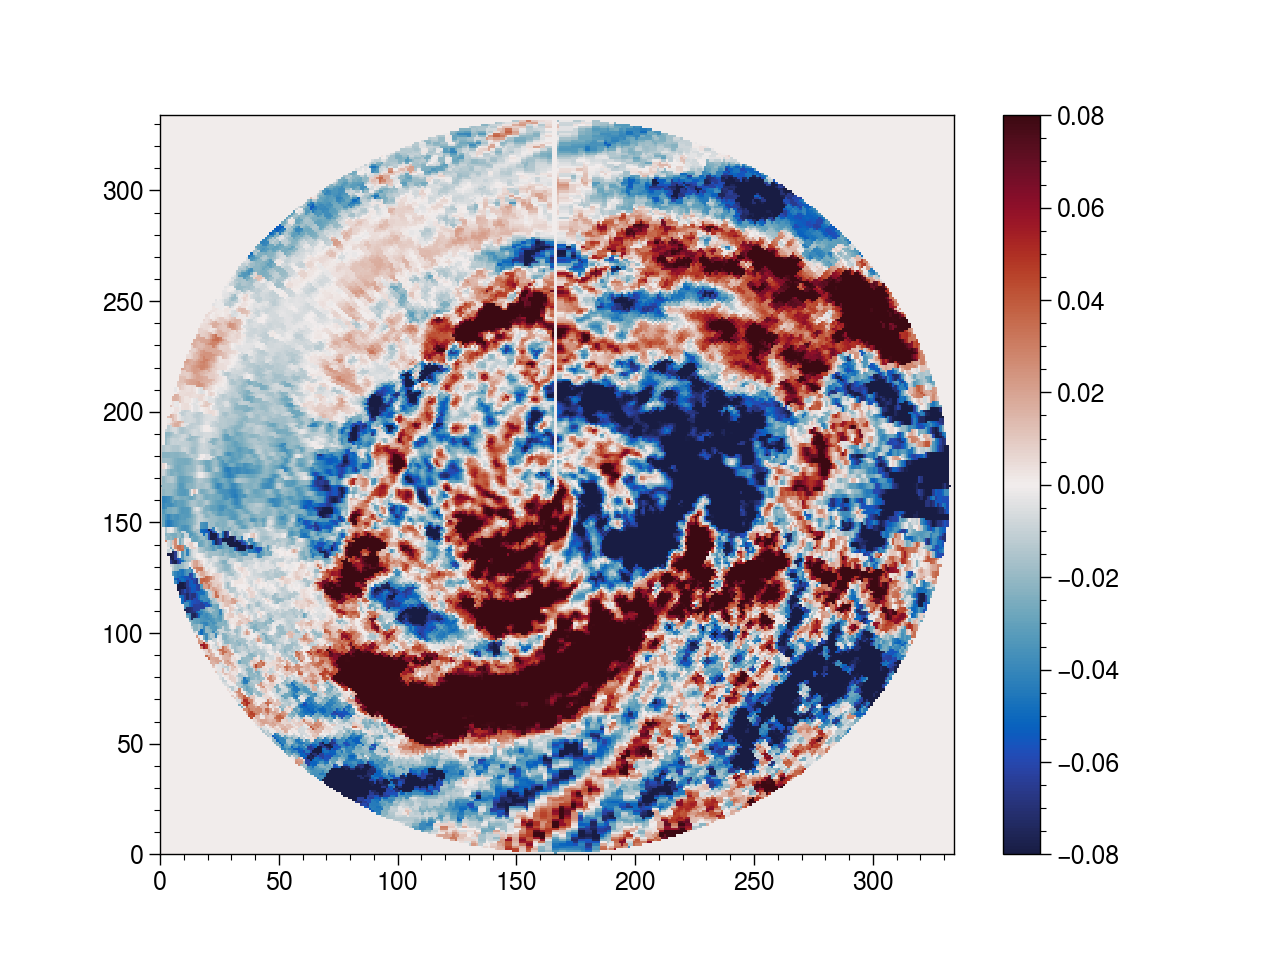

In [15]:
plt.pcolormesh(np.fliplr(np.flipud((proc_tocart(A_dict['dtheta'][80],ANGLE,True,0)*3600))),vmin=-0.08,vmax=0.08,
              cmap='balance')
plt.colorbar()
plt.show()

#### Project other terms onto PCA

In [59]:
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))